# Data Science Job Market in India. 

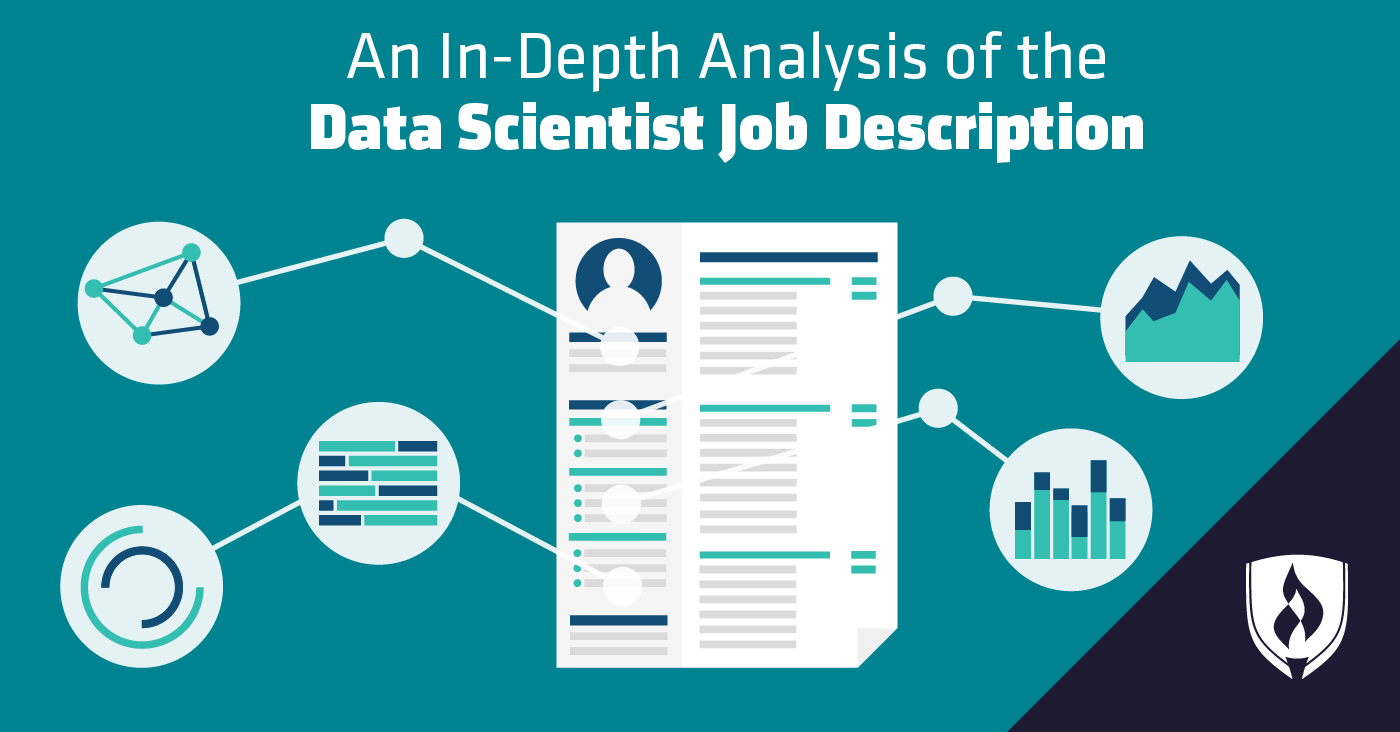

#### This notebook is to support my dataset, I have plotted some very useful graphs which can give a very good visualizations regarding the job market for Data science in India. You can have a look at the dataset and come out with your own outputs. These are visualizations every aspiring data scientist in India should have a look at.
> Key finding from the dataset are:

* The top cities in India with high job openings. 
* The best hiring companies for Data science in India
* The most important coding languages for Data science.
* The most important skills required.

#### There are also some important feature engineering steps I have done befor starting the visualizations. So here we go.

In [ ]:
#import necessary packages
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from operator import itemgetter

In [ ]:
df = pd.read_csv("../input/data-scientist-role-in2020/DataScience_jobs.csv", index_col=0)

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df = df.dropna()

In [ ]:
df = df.apply(lambda x: x.astype(str).str.lower())

In [ ]:
df['experience'] = df['experience'].apply(lambda x: x.split(' ')[0])

In [ ]:
df['locations'] = df['locations'].apply(lambda x: x.split(','))

In [ ]:
df['skills'] = df['skills'].apply(lambda x: x.split('\n'))

In [ ]:
df['roles'] = df['roles'].apply(lambda x: x.replace('sr data scientist','senior data scientist'))

In [ ]:
df['roles'] = df['roles'].apply(lambda x: x.replace('sr. data scientist','senior data scientist'))

In [ ]:
df.locations.apply(pd.Series).stack().str.strip().value_counts()[:10].plot.pie(figsize=(12,10),startangle=150,autopct='%1.1f%%',fontsize=15, shadow=True)
plt.title("Location Wise Data scientist Jobs",fontsize=22)

In [ ]:
df["companies"].value_counts()[:5].plot.pie(figsize=(12,10),explode=[0.03,0.04,0.05,0.06,0.07], startangle=50,autopct='%1.1f%%',fontsize=15)
plt.title("Top 5 companies with Data Science opeanings",fontsize=25)
centre_circle = plt.Circle((0,0),0.72,color='gray', fc='white',linewidth=1)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x="roles", data=df, order = df['roles'].value_counts()[:10].index, palette="rocket")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext= (0, 10), textcoords = 'offset points')
ax.set_title(label='Data Scientist Roles', fontsize=20)
ax.set_xlabel(xlabel='Job roles', fontsize=16)
ax.set_ylabel(ylabel='Number of opeanings', fontsize=16)
plt.xticks(rotation=90)

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x="experience", data=df, order = df['experience'].value_counts()[:10].index, palette="deep")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext= (0, 10), textcoords = 'offset points')
ax.set_title(label='Desired Experience for Data science jobs', fontsize=20)
ax.set_xlabel(xlabel='Experiences', fontsize=16)
ax.set_ylabel(ylabel='Number of opeanings', fontsize=16)
plt.xticks(rotation=90)

In [ ]:
df.skills.apply(pd.Series).stack().value_counts()[:32].plot(kind="bar",figsize=(18,6),fontsize=15,color="g")
plt.xticks(rotation=50,ha='right')
#plt.title("Top Skills for Data science",fontsize=25)
plt.ylabel("No.of Vacancies",fontsize=20)
plt.xlabel("Top Skills for Data science",fontsize=25)
plt.show()

In [ ]:
#lets convert the skills column into a seperate DataFrame, which makes things easy for preo processing
df_skills=pd.DataFrame(df.skills.apply(pd.Series).stack().value_counts()).reset_index()
df_skills.columns=["skills","count"]
df_skills.head()

In [ ]:
languages={}
languages["python"]=df_skills["count"][df_skills['skills'].str.contains('python', regex=True)].sum()
languages["r"]=df_skills["count"][df_skills['skills'].str.contains('^r$', regex=True)].sum()
languages["matlab"]=df_skills["count"][df_skills['skills'].str.contains('matlab', regex=True)].sum()
languages["java"]=df_skills["count"][df_skills['skills'].str.contains('java$', regex=True)].sum()
languages["c++"]=df_skills["count"][df_skills['skills'].str.contains('c\+', regex=True)].sum()
languages["sas"]=df_skills["count"][df_skills['skills'].str.contains('sas', regex=True)].sum()
languages["sql"]=df_skills["count"][df_skills['skills'].str.contains('sql', regex=True)].sum()


#to sort the dictionary
languages=dict(sorted(languages.items(), key=itemgetter(1),reverse=True))

In [ ]:
plt.bar(languages.keys(),languages.values(),color=["b","r","g","y","c","pink","m"])
plt.xticks(rotation=45,fontsize=15)
plt.title("Programming languages for Data science",fontsize=18)
plt.show()


In [ ]:
frameworks={}
frameworks['tensorflow']=df_skills["count"][df_skills['skills'].str.contains('tensor', regex=True)].sum()
frameworks['keras']=df_skills["count"][df_skills['skills'].str.contains('keras', regex=True)].sum()
frameworks['pytorch']=df_skills["count"][df_skills['skills'].str.contains('torch', regex=True)].sum()
plt.bar(frameworks.keys(),frameworks.values(),color=["g","b","c"],width=.5)
plt.xticks(rotation=70,fontsize=15)
plt.title("Deep learning Frameworks",fontsize=20)
plt.show()


In [ ]:
cloud={}
cloud['aws']=df_skills["count"][df_skills['skills'].str.contains('aws', regex=True)].sum()
cloud['azure']=df_skills["count"][df_skills['skills'].str.contains('azure', regex=True)].sum()
cloud['gcp']=df_skills["count"][df_skills['skills'].str.contains('gcp')].sum()
plt.bar(cloud.keys(),cloud.values(),color=["m","y","pink"],width=.45)
plt.xticks(rotation=45,fontsize=15)
plt.title("Clouds for Data Science",fontsize=20)
plt.show()

In [ ]:
bigdata={}
bigdata["spark"]=df_skills["count"][df_skills['skills'].str.contains('spark', regex=True)].sum()
bigdata["hadoop"]=df_skills["count"][df_skills['skills'].str.contains('hadoop', regex=True)].sum()
bigdata["hive"]=df_skills["count"][df_skills['skills'].str.contains('hive', regex=True)].sum()
bigdata["kafka"]=df_skills["count"][df_skills['skills'].str.contains('kafka', regex=True)].sum()

plt.bar(bigdata.keys(),bigdata.values(),color=["black","purple","grey","blue"],width=0.6)
plt.xticks(rotation=45,fontsize=15)
plt.title("Big Data technologies",fontsize=20)
plt.show()

In [ ]:
# tools
tools={}
tools["tableau"]=df_skills["count"][df_skills['skills'].str.contains('tableau', regex=True)].sum()
tools["power_bi"]=df_skills["count"][df_skills['skills'].str.contains('power bi', regex=True)].sum()


plt.bar(tools.keys(),tools.values(),color=["orange","blue"],width=(0.4))
plt.xticks(rotation=45,fontsize=15)
plt.title("Visualization Tools",fontsize=20)
plt.show()

## Conclusion:

#### Now I am sure you might have got some idea about the data science job market in India and what are recruiters demading from you. You do not require all the skills mentioned here though. 

### Kindly Upvote my work if you like it :)

> Here is my other work if you want to have a look: https://www.kaggle.com/vikasbhadoria/notebooks